# Libraries: numpy, scipy, pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 1. Implement function which creates a $nxm$ matrix and fills it with a checkerboard pattern:
<div style="text-align: right">1 point</div>

In [2]:
def checkerboard(n, m):
    """
    :n: int
    :m: int
    :return: numpy.ndarray
    """
    # YOUR CODE HERE
    Z = np.zeros((n,m), dtype=int)
    Z[1::2,::2] = 1
    Z[::2,1::2] = 1
    return Z

In [3]:
print('Checkerboard pattern: \n', checkerboard(3, 3))

Checkerboard pattern: 
 [[0 1 0]
 [1 0 1]
 [0 1 0]]


Expected Output: 
<table>
  <tr>
    <td></td>
    <td> [[0 1 0]
  <tr>
    <td>Checkerboard pattern: </td>
    <td> [1 0 1]
  <tr>
    <td></td>
    <td> [0 1 0]]

#### 2. Implement function which solves system of linear equations:
<div style="text-align: right">1 point</div>

In [4]:
def solve_system(a, b):
    """
    :a: list[list]
    :b: list
    :return: numpy.ndarray
    """
    # YOUR CODE HERE
    a_inv = np.linalg.inv(a)
    return np.dot(a_inv,b)

In [5]:
print('Result: ', solve_system([[3,1], [1,2]], [9,8]))

Result:  [2. 3.]


Expected Output: 
<table>
  <tr>
    <td>Result:</td>
    <td> [2. 3.] </td> 
  </tr>

#### 3. Implement function which multiplies 2 matrixes and returns the max value of each column of the resulting matrix:
<div style="text-align: right">1 point</div>

In [6]:
def mult(m1, m2):
    """
    :m1: numpy.ndarray
    :m2: numpy.ndarray
    :return: numpy.ndarray
    """
    # YOUR CODE HERE
    z = np.dot(m1,m2)
    return z.max(axis=0)

In [7]:
p = np.array([[1, 9], [0, 1]])
q = np.array([[1, 2], [3, 9]])
print('Result: ', mult(p, q))

Result:  [28 83]


Expected Output: 
<table>
  <tr>
    <td>Result:</td>
    <td> [28 83] </td> 
  </tr>

#### 4. Implement function add_mean_and_calc_det(matrix), which adds to each element in the matrix row the mean of this row and returns the determinant of the resulting matrix.
<div style="text-align: right">1 point</div>

In [107]:
def add_mean_and_calc_det(matrix):
    """
    :matrix: numpy.ndarray[list[list[int]]]
    :return: numpy.float64
    """
    # YOUR CODE HERE
    mean = matrix.mean(axis=1)
    return np.linalg.det(matrix.T + mean)

In [108]:
print('Result:', add_mean_and_calc_det(np.array([[5, 3, 4], [7, 9, 8], [6, 7, 8]])))

Result: 72.00000000000006


Expected Output: 
<table>
  <tr>
    <td>Result:</td>
    <td> 72.0 </td> 
  </tr>

#### 5. Implement function nearest_to_scalar(matrix, n), which returns the closest to n number in the matrix.
<div style="text-align: right">1 point</div>

In [10]:
import numpy as np
def nearest_to_scalar(matrix, n):
    """
    :param matrix: numpy.ndarray[list[list[int]]]
    :param n: int
    :return: int  
    """
    # YOUR CODE HERE
    a = np.array(matrix).flatten()
    z = np.array(abs(a - n))
    idx = np.argmin(z)
    return a[idx]

In [11]:
print('Nearest:', nearest_to_scalar(np.array([[5, 3, 4], [7, 9, 8], [6, 7, 8]]), 11))

Nearest: 9


Expected Output:
<table>
  <tr>
    <td>Nearest:</td>
    <td> 9 </td> 
  </tr>

#### 6. Implement function svd_ranks(Z) which performs SVD of given matrix and returns a list of ranks of matrices U, S and V.
<div style="text-align: right">1 point</div>

In [157]:
def svd_ranks(Z): 
    """
    :param Z: numpy.ndarray[list[list[int]]]
    :return: list  
    """
    # YOUR CODE HERE
    ranks = []
    u, s, v = np.linalg.svd(Z)
    for i in np.linalg.svd(Z):
        ranks.append(np.linalg.matrix_rank(i, ))
    
    ranks[1] = ranks[1]+1
    return ranks
    

In [158]:
print('Svd ranks:', svd_ranks(np.arange(9).reshape((3, 3))))

Svd ranks: [3, 2, 3]


Expected Output: 
<table>
  <tr>
    <td>Svd ranks:</td>
    <td> [3, 2, 3] </td> 
  </tr>

#### 7. Implement function to sort a given complex array using the real part first, then the imaginary part:
<div style="text-align: right">1 point</div>

In [111]:
def complex_sort(complex_nums):
    """
    :complex_nums: list
    :return: np.array  
    """
    # YOUR CODE HERE
    return np.sort_complex(complex_nums)

In [112]:
print('Result: ', complex_sort([1 + 2j, 3 - 1j, 3 - 2j, 4 - 3j, 3 + 5j]))

Result:  [1.+2.j 3.-2.j 3.-1.j 3.+5.j 4.-3.j]


Expected Output: 
<table>
  <tr>
    <td>Result:</td>
    <td> [1.+2.j 3.-2.j 3.-1.j 3.+5.j 4.-3.j]

#### 8. Implement a function that computes the Mandelbrot fractal:
<div style="text-align: right">4 points</div>

In [113]:
def compute_mandelbrot(n_max, threshold, nx, ny):
    """
    :n_max: int
    :threshold: float
    :nx: int
    :ny: int
    :return: np.array  
    """
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:,np.newaxis] + 1j * y[np.newaxis,:]

    # Mandelbrot iteration
    # YOUR CODE HERE
    Z = np.zeros((nx, ny), dtype=complex)
    M = np.full((nx, ny), True, dtype=bool)
    for i in range(n_max):
        Z[M] = Z[M] * Z[M] + c[M]
        M[np.abs(Z) > threshold] = False
    return M

Shape:  (601, 401)


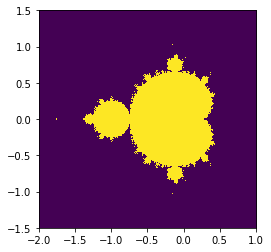

In [17]:
mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)
plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
print('Shape: ', mandelbrot_set.shape)

Expected Output: 
<table>
  <tr>
    <td>Shape:</td>
    <td> (601, 401)</td>
<td><img src="http://157.230.116.154:1338/uploads/1a2ae116fb684ec5a1d75b199017a24b.png"></td>

#### 9. Consider the following dictionary "data" and list "labels":

In [18]:
data = {'animal': ['cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog'],
        'age': [2.5, 1, 0.5, np.nan, 5, 2, 3.5, np.nan, 7, 3],
        'weight': [1, 3, 6, 8, 4, 3, 10, 2, 7, 3],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

**9.1 Implement function repl_nan(data, labels) which creates a dataframe from dictionary  "data" with indexes from the list "labels", replaces the values "nan" in the age field by the mean age depending on the animal's type and returns a new dataframe.**
<div style="text-align: right">1 point</div>

In [19]:
def repl_nan(data, labels):    
    """
    :param data: dict
    :param labels: list[str]
    :return: pandas.core.frame.DataFrame 
    """
    # YOUR CODE HERE
    x = pd.DataFrame(data=data, index=labels)
    x['age'] = x.groupby('animal')['age'].apply(lambda x: x.fillna(x.mean()))
    return x

In [20]:
repl_nan(data, labels)

,animal,age,weight,priority
a,cat,2.500,1,yes
b,cat,1.000,3,yes
c,dog,0.500,6,no
d,dog,3.500,8,yes
e,cat,5.000,4,no
f,cat,2.000,3,no
g,dog,3.500,10,no
h,cat,2.625,2,yes
i,dog,7.000,7,no
j,dog,3.000,3,no


Expected Output: 

|index| animal   |   age |   weight | priority   |
|----|----------|-------|----------|------------|
| **a**  | cat      | 2.5   |        1 | yes        |
| **b**  | cat      | 1     |        3 | yes        |
| **c**  | dog      | 0.5   |        6 | no         |
| **d**  | dog      | 3.5   |        8 | yes        |
| **e**  | cat      | 5     |        4 | no         |
| **f**  | cat      | 2     |        3 | no         |
| **g**  | dog      | 3.5   |       10 | no         |
| **h**  | cat      | 2.625 |        2 | yes        |
| **i**  | dog      | 7     |        7 | no         |
| **j**  | dog      | 3     |        3 | no         |

#### 9.2 Implement function weight_to_type(data, labels) which creates a dataframe from dictionary "data" with indexes from the list "labels", calculates average weight of each animal type and returns dictionary with these values, where keys are animal types and values are animal weights.
<div style="text-align: right">1 point</div>

In [21]:
def weight_to_type(data, labels):    
    """
    :param data: dict
    :param labels: list[str]
    :return: dict
    """
    # YOUR CODE HERE
    df = pd.DataFrame(data=data, index=labels)
    #df['age'].fillna(0, inplace=True)
    #df['weigh_sum'] = df.groupby('animal')['age'].apply(lambda x: x / sum(x))
    x = df.groupby('animal')['weight'].apply(lambda x: np.mean(x))
    dictionary = x.to_dict()
    return dictionary

In [22]:
print('weight_to_type:', weight_to_type(data, labels))

weight_to_type: {'cat': 2.6, 'dog': 6.8}


Expected Output: 
<table>
  <tr>
    <td>weight_to_type:</td>
    <td> {'cat': 2.6, 'dog': 6.8} </td> 
  </tr>

#### 9.3  Implement function kittens(data, labels) which creates a dataframe from dictionary "data" with indexes from the list "labels" and returns dataframe with data about cats with age < 3.
<div style="text-align: right">1 point</div>

In [23]:
def kittens(data, labels):    
    """
    :param data: dict
    :param labels: list[str]
    :return: pandas.core.frame.DataFrame
    """
    # YOUR CODE HERE
    df = pd.DataFrame(data=data, index=labels)
    return df[df['animal'] == 'cat'][df['age'] < 3]

In [24]:
kittens(data, labels)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,animal,age,weight,priority
a,cat,2.5,1,yes
b,cat,1.0,3,yes
f,cat,2.0,3,no


Expected Output: 

|  index  | animal   |   age |   weight | priority   |
|:---|:---------|------:|---------:|:-----------|
| a  | cat      |   2.5 |        1 | yes        |
| b  | cat      |   1   |        3 | yes        |
| f  | cat      |   2   |        3 | no         |

#### 9.4  Implement function sorted_df(data, labels) which creates a dataframe from dictionary "data" with indexes from the list "labels" which returns dataframe sorted  firstly by age in a decreasing order, secondly, for the number of weight in ascending order.
<div style="text-align: right">1 point</div>

In [114]:
def sorted_df(data, labels):
    """
    :param data: dict
    :param labels: list[str]
    :return: pandas.core.frame.DataFrame 
    """
    # YOUR CODE HERE
    df = pd.DataFrame(data=data, index=labels)
    df.sort_values(by=['age', 'weight'], ascending=[False, True], inplace=True)
   # df.fillna('nan', inplace=True)
    return  df

In [115]:
sorted_df(data, labels)

,animal,age,weight,priority
i,dog,7.0,7,no
e,cat,5.0,4,no
g,dog,3.5,10,no
j,dog,3.0,3,no
a,cat,2.5,1,yes
f,cat,2.0,3,no
b,cat,1.0,3,yes
c,dog,0.5,6,no
h,cat,NaN,2,yes
d,dog,NaN,8,yes


Expected Output: 

|  index| animal   |   age |   weight | priority   |
|:---|:---------|------:|---------:|:-----------|
| i  | dog      |   7   |        7 | no         |
| e  | cat      |   5   |        4 | no         |
| g  | dog      |   3.5 |       10 | no         |
| j  | dog      |   3   |        3 | no         |
| a  | cat      |   2.5 |        1 | yes        |
| f  | cat      |   2   |        3 | no         |
| b  | cat      |   1   |        3 | yes        |
| c  | dog      |   0.5 |        6 | no         |
| h  | cat      | nan   |        2 | yes        |
| d  | dog      | nan   |        8 | yes        |

#### 10. Markov Chain
<div style="text-align: right">5 points</div>
<img src="http://157.230.116.154:1338/uploads/e35cccf9167841479bf0c4174b9cb85c.png">

Markov chain transition matrix P, and probability distribution on the states p:

1. $0 <= P[i,j] <= 1:$ probability to go from state i to state j
2. Transition rule: $p_{new} = P^T p_{old}$
3. all(sum(P, axis=1) == 1), p.sum() == 1: normalization

#### Implement function that works with 5 states, and:

1. Constructs a random matrix, and normalizes each row so that it is a transition matrix.
2. Starts from a random (normalized) probability distribution p and takes n_states => p_(n_states)
3. Computes the stationary distribution: the eigenvector of P.T with eigenvalue 1 (numerically: closest to 1) => p_stationary

(Don't forget to normalize the eigenvector)

Checks if p_(n_states) and p_stationary are equal to tolerance

In [103]:
def markov_chain(n_states, n_steps, tolerance):
    """
    :n_states: int
    :n_steps: int
    :tolerance: float
    :return: np.array, np.array 
    """
    
    np.random.seed(1234)
    
    # Random transition matrix and state vector
    P = np.random.rand(n_states, n_states)
    p = np.random.rand(n_states)
    
    # YOUR CODE HERE
    row_sums = P.sum(axis=1)
    P = P / row_sums[:, np.newaxis]
    p = p / sum(p)
    
    for i in range(n_steps):
        p = P.T.dot(p)
    
    p_ = p
    
    w, v = np.linalg.eig(P.T)
    j_stationary = np.argmin(abs(w - 1.0))
    p_stationary = v[:,j_stationary].real
    p_stationary /= p_stationary.sum()
    
    return  p_stationary , p_
    

In [104]:
n_states = 6
n_steps = 60
tolerance = 1e-5
p_stationary, p_last = markov_chain(n_states, n_steps, tolerance)

if all(abs(p_last - p_stationary) < tolerance):
    print("Tolerance satisfied in infty-norm")

if np.linalg.norm(p_last - p_stationary) < tolerance:
    print("Tolerance satisfied in 2-norm")
    
print('p_stationary: ', p_stationary)
print('p_last: ', p_last)

Tolerance satisfied in infty-norm
Tolerance satisfied in 2-norm
p_stationary:  [0.17642782 0.21675892 0.16375743 0.20031888 0.13175137 0.11098559]
p_last:  [0.17642782 0.21675892 0.16375743 0.20031888 0.13175137 0.11098559]


Expected Output: 
<table>
  <tr>
    <td>Tolerance satisfied in infty-norm</td>
  <tr>
    <td>Tolerance satisfied in 2-norm</td>
  <tr>
    <td>p_stationary:   [0.17642782 0.21675892 0.16375743 0.20031888 0.13175137 0.11098559]</td>
  <tr>
    <td>p_last:  [0.17642782 0.21675892 0.16375743 0.20031888 0.13175137 0.11098559]</td>
    